This notebook has been created from the following links
* [GBM tutorial](http://nbviewer.jupyter.org/urls/s3.amazonaws.com/datarobotblog/notebooks/gbm-tutorial.ipynb)
* [make_hastie_10_2](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html)
* [Gradient boosting classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
* [make_hastie_10_2 example](https://betatim.github.io/posts/matching-machine-learning/)
* [ensemble methods](http://scikit-learn.org/stable/modules/ensemble.html)

In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import seaborn as sns
%matplotlib inline
import numpy as np

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.5/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Create a synthetic dataset with 10 columns of 5000 samples, each with mean 0 and standard deviation 1

In [2]:
X, y = make_hastie_10_2(n_samples=5000)

Display the means and standard deviations

In [3]:
print('means: {}\n stdev: {}'.format(X.mean(axis=0), X.std(axis=0)))

means: [-0.01442012  0.01332221 -0.01192448 -0.00743199  0.00511333 -0.01685156
 -0.03092116 -0.00104075 -0.0055289   0.01825985]
 stdev: [ 0.98934995  0.98376335  1.00755754  1.01383939  0.9813609   1.0074818
  0.99349446  0.99118475  1.00592632  1.01308522]


The dependent variable $y$ is either 1.0 or -1.0 and can be converted to True or False

In [4]:
columns = ['c' + str(idx) for idx in range(X.shape[1])]
df = pd.DataFrame(X, columns=columns)
df['y_val'] = pd.Series(y, dtype='int').apply(lambda x: True if x > 0 else False)

The $y$ value is computed as follows

In [5]:
df['y_val2'] = np.sum(X ** 2, axis=1) > 9.34

Compare the $y$ value from the function with the computed value to show they match

In [6]:
all(df.y_val == df.y_val2)

True

There are similar number of True and False $y$ values

In [7]:
df.y_val.value_counts()

False    2523
True     2477
Name: y_val, dtype: int64

There is significant overlap in the $y$ values (blue and green) when plotted against any two inputs

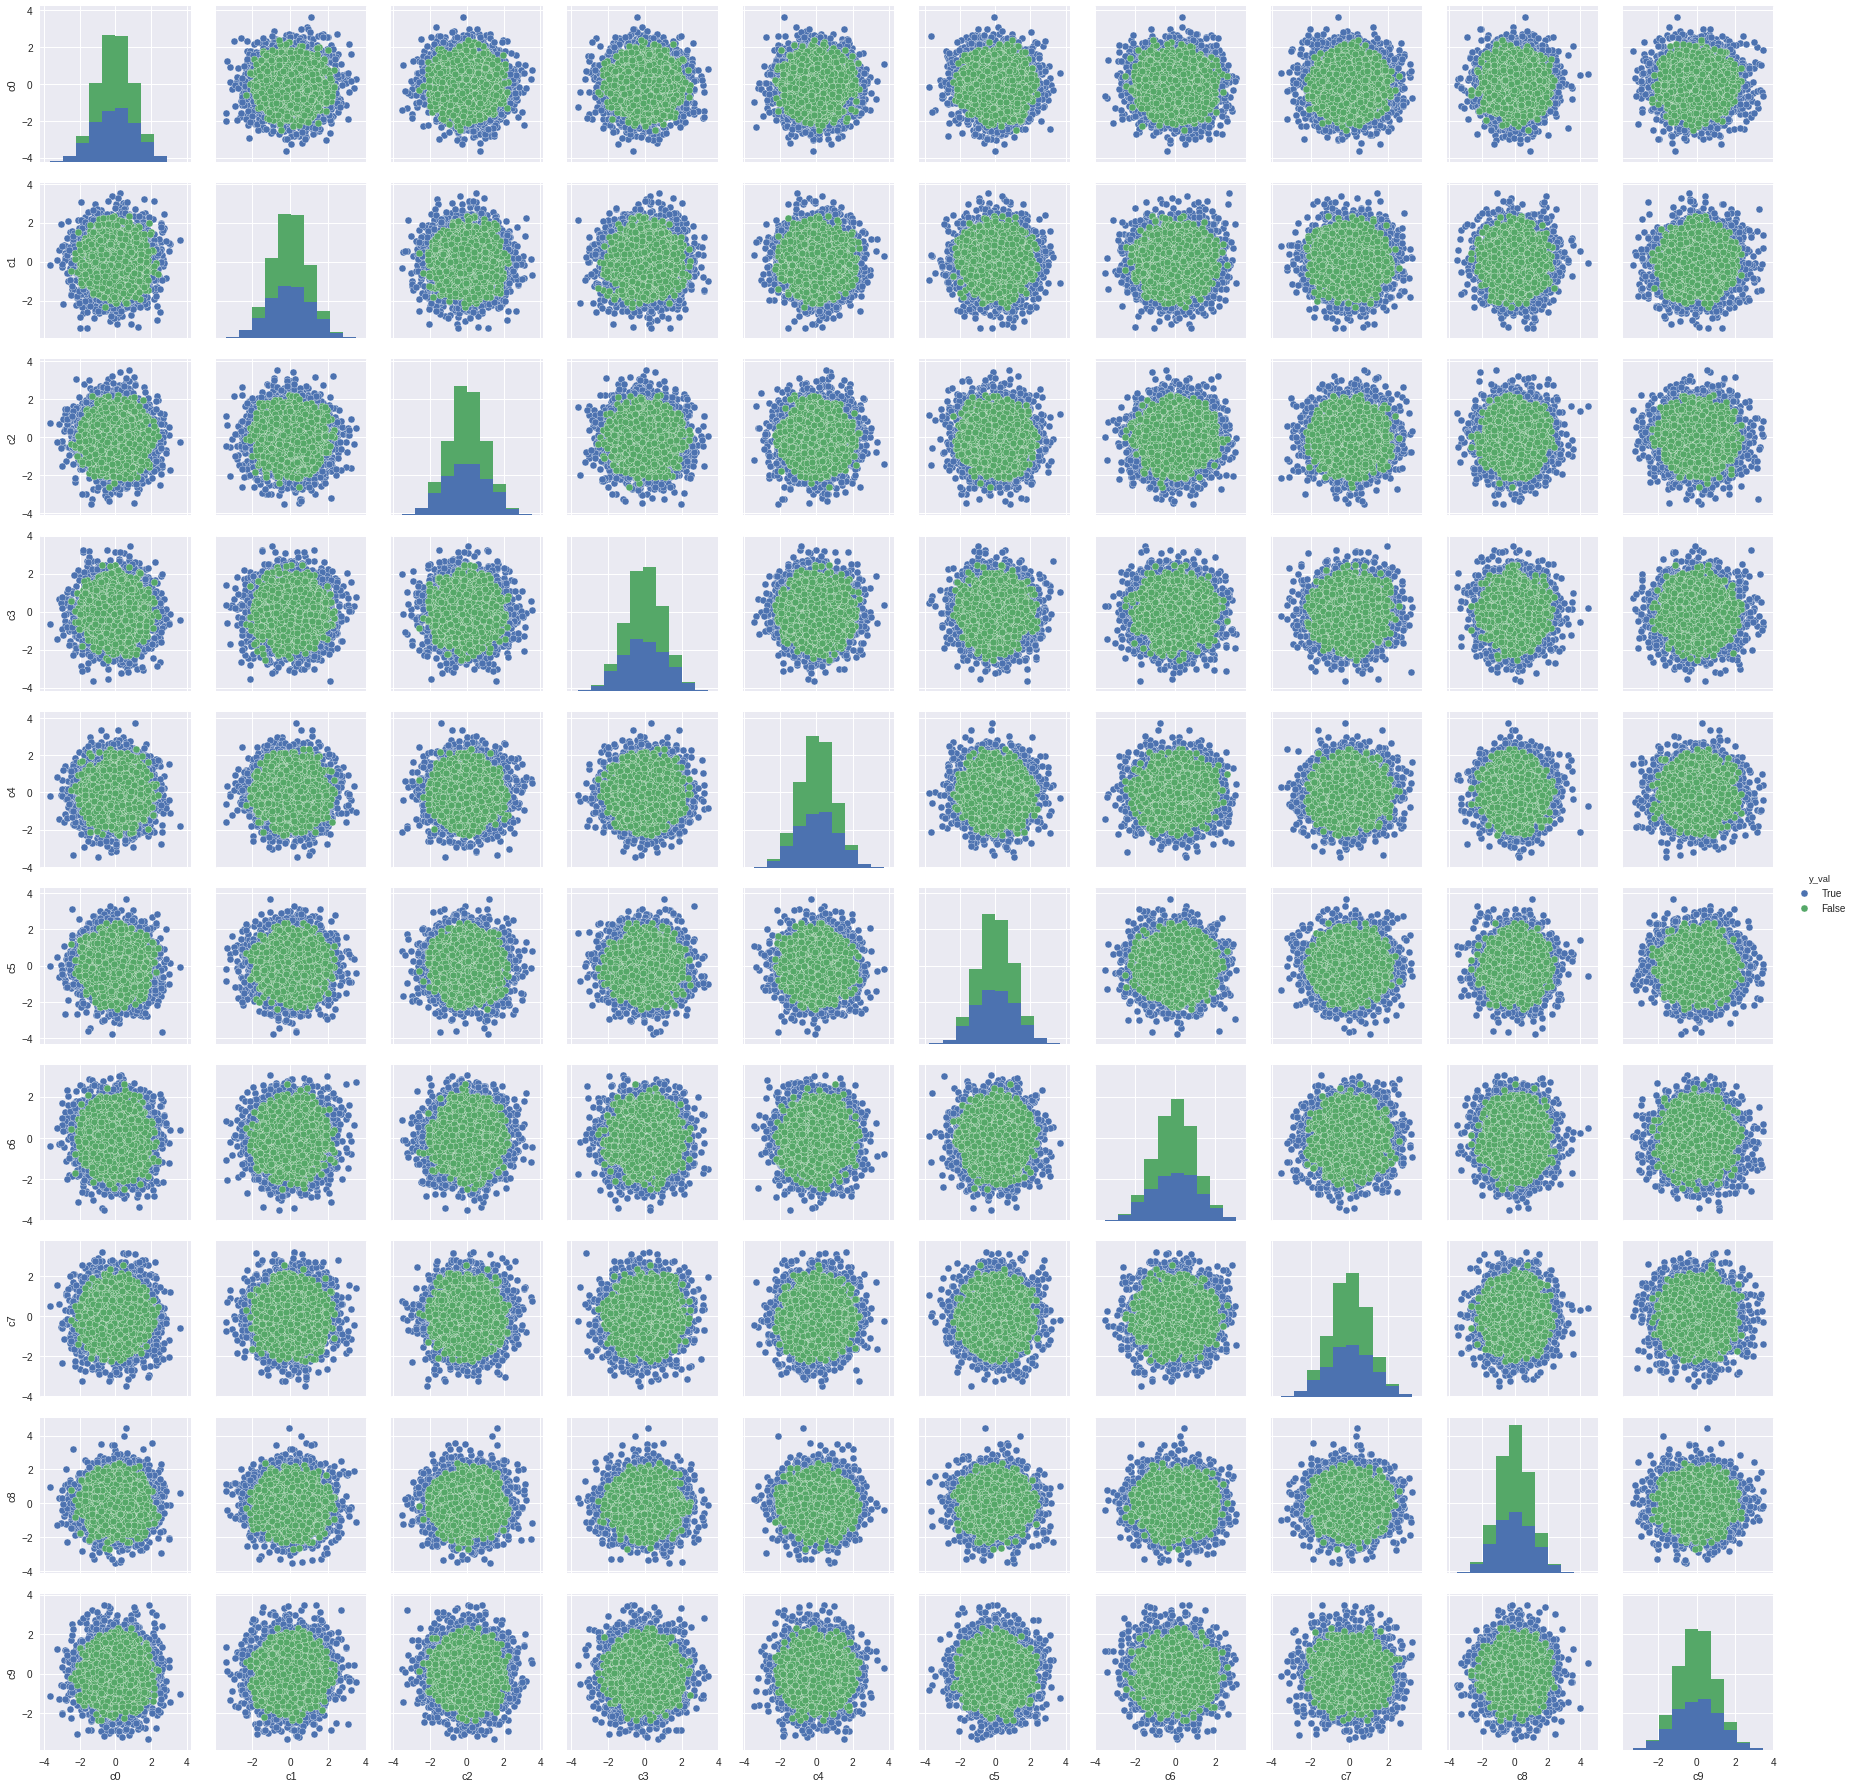

In [8]:
sns.pairplot(df, vars=columns, hue='y_val', hue_order=[True, False])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# fit estimator
est = GradientBoostingClassifier(n_estimators=200, max_depth=3)
est.fit(X_train, y_train)

# predict class labels
pred = est.predict(X_test)

# score on test data (accuracy)
acc = est.score(X_test, y_test)
print('ACC: %.4f' % acc)

ACC: 0.9120


All the 10 features are approximately equally important

In [13]:
est.feature_importances_

array([ 0.09810885,  0.09298478,  0.11600336,  0.09912146,  0.1046448 ,
        0.0889069 ,  0.09758783,  0.0978058 ,  0.09806736,  0.10676887])

The precision and recall values show similar scores

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

       -1.0       0.89      0.94      0.91       623
        1.0       0.94      0.89      0.91       627

avg / total       0.91      0.91      0.91      1250

